In [2]:
import os
os.chdir("/home/yaroslav/FCUL/MARS_1.0")

In [4]:
import ijson
import json
import duckdb
from project_cda.walker import Walker, RandomCrowd
import numpy as np
from collections import Counter

In [5]:
users_dict = 'data/helpers/user_dict_filtered.json'
users_table = duckdb.query("""CREATE OR REPLACE TABLE users AS SELECT * FROM read_csv_auto('data/datasets/anime_azathoth42/users_sterilized.csv')""")

In [7]:
def fetch_secondary_user_data(username):
    return duckdb.execute(f"""
                          SELECT birth_date, country, gender, join_date, stats_mean_score
                          FROM users WHERE username = ?""", [username]).fetchall()[0]

In [7]:
with open(users_dict, 'rb') as uf:
    parser = ijson.kvitems(uf, "")
    t = 0
    penaltys = []
    history = []
    for username, animelist in parser:
        print(len(animelist))
        w = Walker(username, animelist)
        for k, v in w.summary().items():
            print(f"{k} | {v}")
        
        # r = RandomCrowd(users=[w])
        # r.run()
        # r.evaluate()
        # for k, v in r.metrics.items():
        #     print(f"{k} | {v}")
        t += 1
        if t > 0:
            break

penaltys = np.array(penaltys)
history = np.array(history)

[13:05:22] [DEBUG] [WALKER] choujikun10 Walker is initializing
[13:05:22] [DEBUG] [WALKER] choujikun10 Trail builded
[13:05:22] [DEBUG] [WALKER] choujikun10 Cheating factor calculated
[13:05:22] [DEBUG] [WALKER] choujikun10 Walker initialized. Start year: 2013. Start node: 20


240
username | choujikun10
n | 240
cheating_factor | 0.5815899581589958
median_delta | 0:01:03
perc90_delta | 21 days, 2:17:47.200000


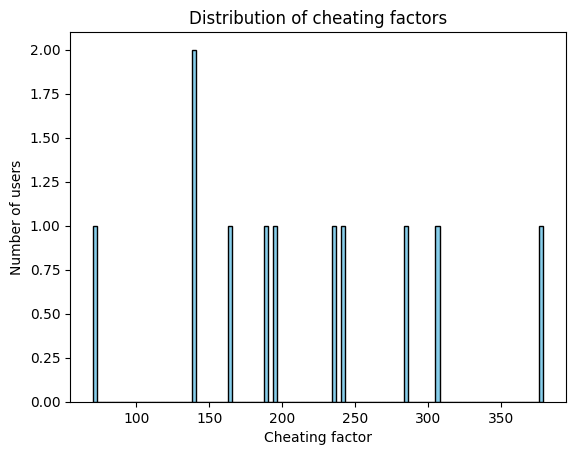

In [ ]:
import matplotlib.pyplot as plt

plt.hist(history, bins=100, color='skyblue', edgecolor='black')
plt.xlabel("Cheating factor")
plt.ylabel("Number of users")
plt.title("Distribution of cheating factors")
plt.show()
